In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
#from sklearn.svm import SVC
from sklearn.metrics import *
%matplotlib inline

C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import and read data sets
dk = pd.read_csv('Big_mart.csv')
df=dk.head()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#features of data set
dk.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
#describe data set
df.describe

<bound method NDFrame.describe of   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1

In [5]:

#shape of data set
dk.shape

(8523, 12)

In [6]:

#find all null values in data set
dk.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#replace NaN value in feature:Item_weight 
dk.Item_Weight.fillna(dk.Item_Weight.mean(),inplace=True)

In [8]:
#Replace missing value in feature:Outlet_size
dk.Outlet_Size.fillna('Missing',inplace=True)

In [9]:
#replace all change value from the pattern 
dk['Item_Fat_Content'] = dk['Item_Fat_Content'].replace('low fat','Low Fat')
dk['Item_Fat_Content'] = dk['Item_Fat_Content'].replace('LF','Low Fat')
dk['Item_Fat_Content'] = dk['Item_Fat_Content'].replace('reg','Regular')


In [10]:
#Find correlation
dk.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


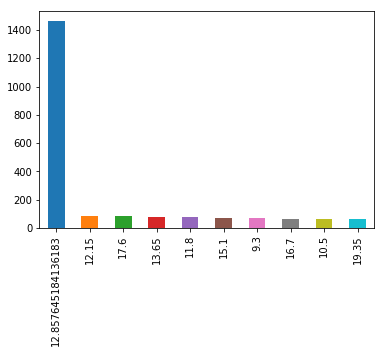

In [11]:
#bar plot for Item_weight of the data set
dk['Item_Weight'].value_counts().head(10).plot.bar()

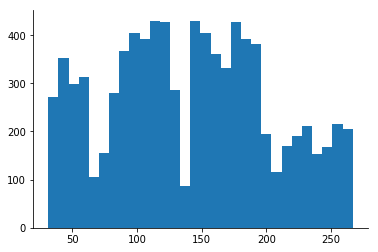

In [12]:

#plot histogram for item weigh.
plt.hist(x  = 'Item_MRP',data=dk, bins=30)
sns.despine()

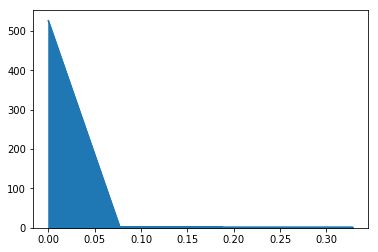

In [13]:
#area plot for Item_visibility
dk['Item_Visibility'].value_counts().plot.area()

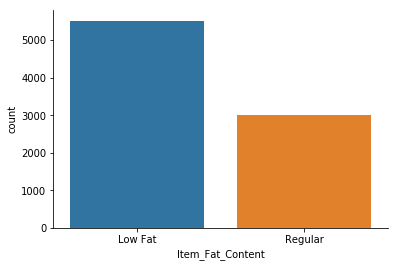

In [14]:
#Fat content of the item.
sns.countplot(x  = 'Item_Fat_Content',data=dk)
sns.despine()

C:\Users\Kavya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


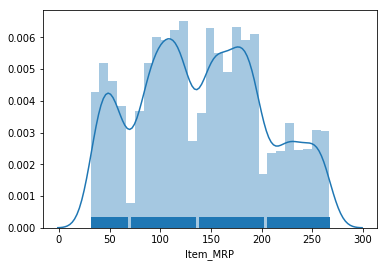

In [15]:
#distplot
sns.distplot(dk['Item_MRP'], rug = True);

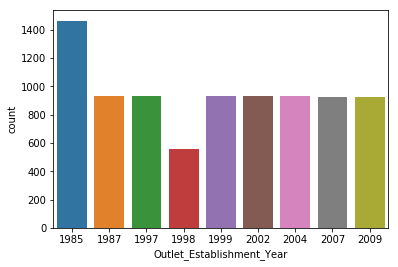

In [16]:
#countplot for the data set feature: Outlet_Establishment_year.
sns.countplot(x = 'Outlet_Establishment_Year', data = dk)

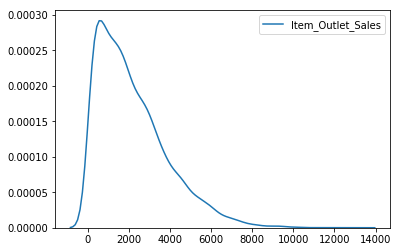

In [17]:
#Kde plot
sns.kdeplot(dk['Item_Outlet_Sales'])

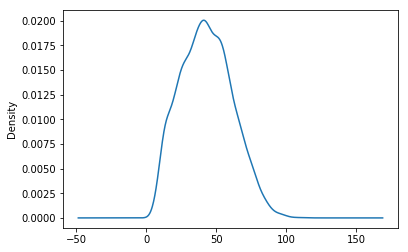

In [18]:
#plot root mean square
p = np.power(dk['Item_Outlet_Sales'],1/2)
p.plot(kind = 'kde')

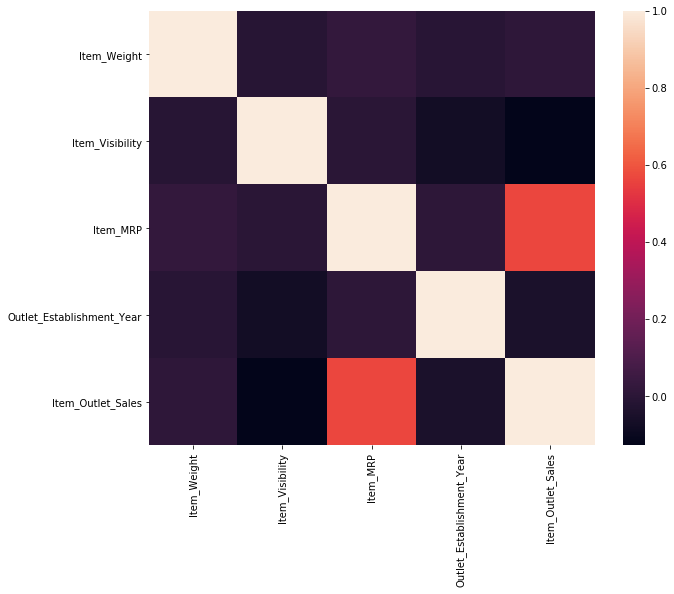

In [19]:
#plot heatmap to identify correlation
plt.figure(figsize=(10,8))
sns.heatmap(dk.corr())

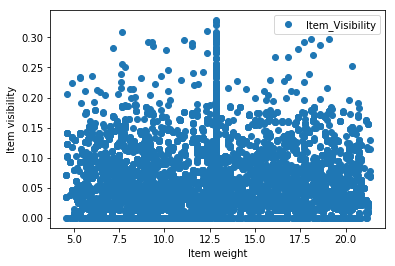

In [20]:
#plot Item_Weight Vs. Item_Visibility
dk.plot(x='Item_Weight', y= 'Item_Visibility', style ='o')
plt.xlabel('Item weight')
plt.ylabel('Item visibility')
plt.show()

C:\Users\Kavya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Kavya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


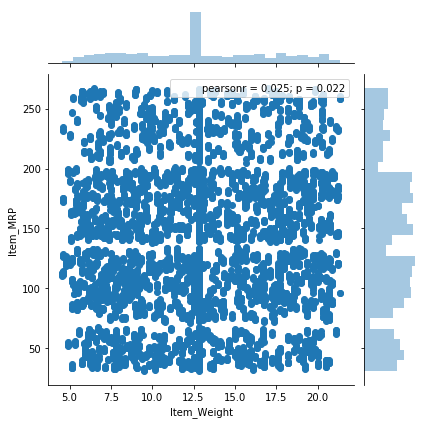

In [21]:
#jointplot between price and bedrooms
sns.jointplot(x='Item_Weight',y='Item_MRP',data=dk)

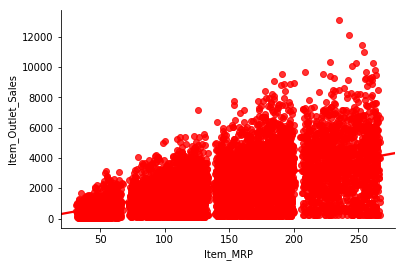

In [22]:
#regplot
sns.regplot(x = 'Item_MRP', y='Item_Outlet_Sales',data = dk, color = 'red')
sns.despine()

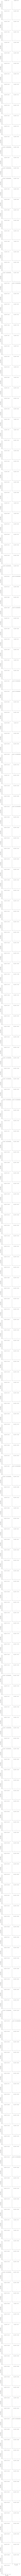

In [23]:
#facet grid
d=dk.head(500)
g = sns.FacetGrid(d, col='Item_MRP',col_wrap=2)
g.map(plt.scatter,'Item_Weight','Item_Visibility',alpha = 0.2)
p=sns.despine()

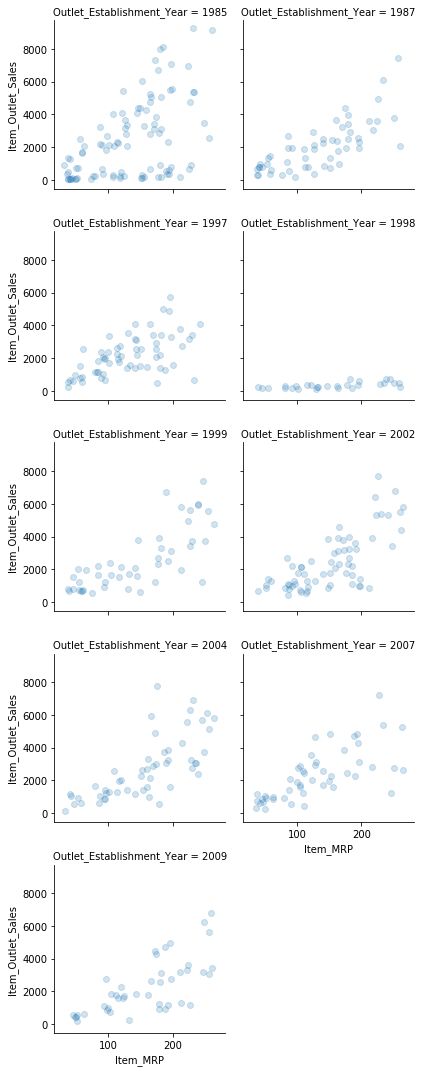

In [24]:
grid = sns.FacetGrid(d, col='Outlet_Establishment_Year',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

In [25]:
df = pd.get_dummies(ds, columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'])
df.head(20)

NameError: name 'ds' is not defined

In [ ]:
y = df['Item_Outlet_Sales']
x = df.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

In [ ]:

#perform split on training data
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state =85)

In [ ]:
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

In [ ]:
regressor.score(x_test,y_test)

In [ ]:
clf = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(x_train,y_train)
results = model_selection.cross_val_score(clf, x_train,y_train)
results.mean()

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)

In [ ]:
pred=gbr.predict(x_test)

In [ ]:
gbr.score(x_test,y_test)